In [1]:
import wfdb

import numpy as np 
import pandas as pd

import neurokit2 as nk 

import ipywidgets as widgets
import matplotlib.pyplot as plt 

In [2]:
methods_box = widgets.Select(
    options=["pantompkins1985", "hamilton2002", "zong2003", "martinez2004",
             "christov2004", "gamboa2008", "elgendi2010", "elgendi2010",
             "engzeemod2012", "manikandan2012", "kalidas2017", "nabian2018",
             "rodrigues2021", "koka2022", "promac"],
    description="Algorithms for peak-detection",
    disable=False,
    layout={'width': 'max-content'}
)



In [3]:
ecg_record=wfdb.rdrecord("mitdb/101")
display(ecg_record.__dict__)
ecg_signal=ecg_record.p_signal[:,0]

{'record_name': '101',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['75 F 1011 654 x1', 'Diapres'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[-0.345, -0.16 ],
        [-0.345, -0.16 ],
        [-0.345, -0.16 ],
        ...,
        [-0.295, -0.11 ],
        [-0.29 , -0.11 ],
        [ 0.   ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['101.dat', '101.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [955, 992],
 'checksum': [29832, 19589],
 'block_size': [0, 0]}

In [4]:
#extract R-peak Locations
info,r_peaks=nk.ecg_peaks(ecg_signal,sampling_rate=360)
r_peaks

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([   396,    711,   1032, ..., 649003, 649371, 649750]),
 'sampling_rate': 360}

In [5]:
def plot_first_5Rpeaks(method, signal):
    # Zooming into the first 5 R-peaks
    _, r_peaks = nk.ecg_peaks(signal, sampling_rate=360, method=method)
    plot = nk.events_plot(r_peaks['ECG_R_Peaks'][:6], signal[:1800])
    return plot


In [16]:
display(methods_box)


Select(description='Algorithms for peak-detection', index=2, layout=Layout(width='max-content'), options=('pan…

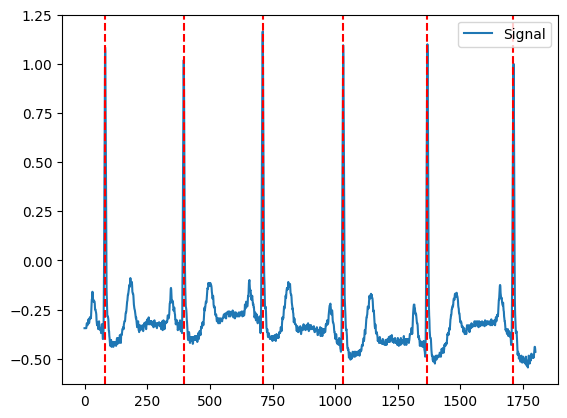

In [17]:
plot_first_5Rpeaks(methods_box.value,ecg_signal)